___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.shape

(1000, 11)

In [5]:
df.dtypes

XVPM            float64
GWYH            float64
TRAT            float64
TLLZ            float64
IGGA            float64
HYKR            float64
EDFS            float64
GUUB            float64
MGJM            float64
JHZC            float64
TARGET CLASS      int64
dtype: object

In [6]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [7]:
df.groupby('TARGET CLASS').size()

TARGET CLASS
0    500
1    500
dtype: int64

In [8]:
df.corr()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,1.000000,-0.004816,-0.014219,0.055256,0.003688,0.001883,-0.023526,0.032118,-0.016091,0.026222,-0.079896
GWYH,-0.004816,1.000000,-0.224859,0.121623,-0.104795,0.042529,-0.102221,0.061553,0.039728,0.105532,-0.416168
TRAT,-0.014219,-0.224859,1.000000,-0.037726,0.124870,0.005462,0.118736,-0.073203,-0.067177,-0.119816,0.489347
TLLZ,0.055256,0.121623,-0.037726,1.000000,-0.005545,-0.004792,-0.063989,0.053958,0.094121,0.065143,-0.172029
IGGA,0.003688,-0.104795,0.124870,-0.005545,1.000000,0.003631,0.076304,-0.042134,-0.011688,-0.066895,0.295390
HYKR,0.001883,0.042529,0.005462,-0.004792,0.003631,1.000000,-0.007452,0.004891,0.025553,-0.006403,-0.015266
EDFS,-0.023526,-0.102221,0.118736,-0.063989,0.076304,-0.007452,1.000000,-0.071361,0.005865,-0.047928,0.281607
GUUB,0.032118,0.061553,-0.073203,0.053958,-0.042134,0.004891,-0.071361,1.000000,0.011507,0.061170,-0.174496
MGJM,-0.016091,0.039728,-0.067177,0.094121,-0.011688,0.025553,0.005865,0.011507,1.000000,0.014342,-0.098887
JHZC,0.026222,0.105532,-0.119816,0.065143,-0.066895,-0.006403,-0.047928,0.061170,0.014342,1.000000,-0.301725


In [9]:
df.skew()

XVPM            0.122271
GWYH            0.166346
TRAT            0.104442
TLLZ           -0.279844
IGGA           -0.046554
HYKR           -0.175379
EDFS            0.033694
GUUB            0.372588
MGJM            0.066164
JHZC            0.040476
TARGET CLASS    0.000000
dtype: float64

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

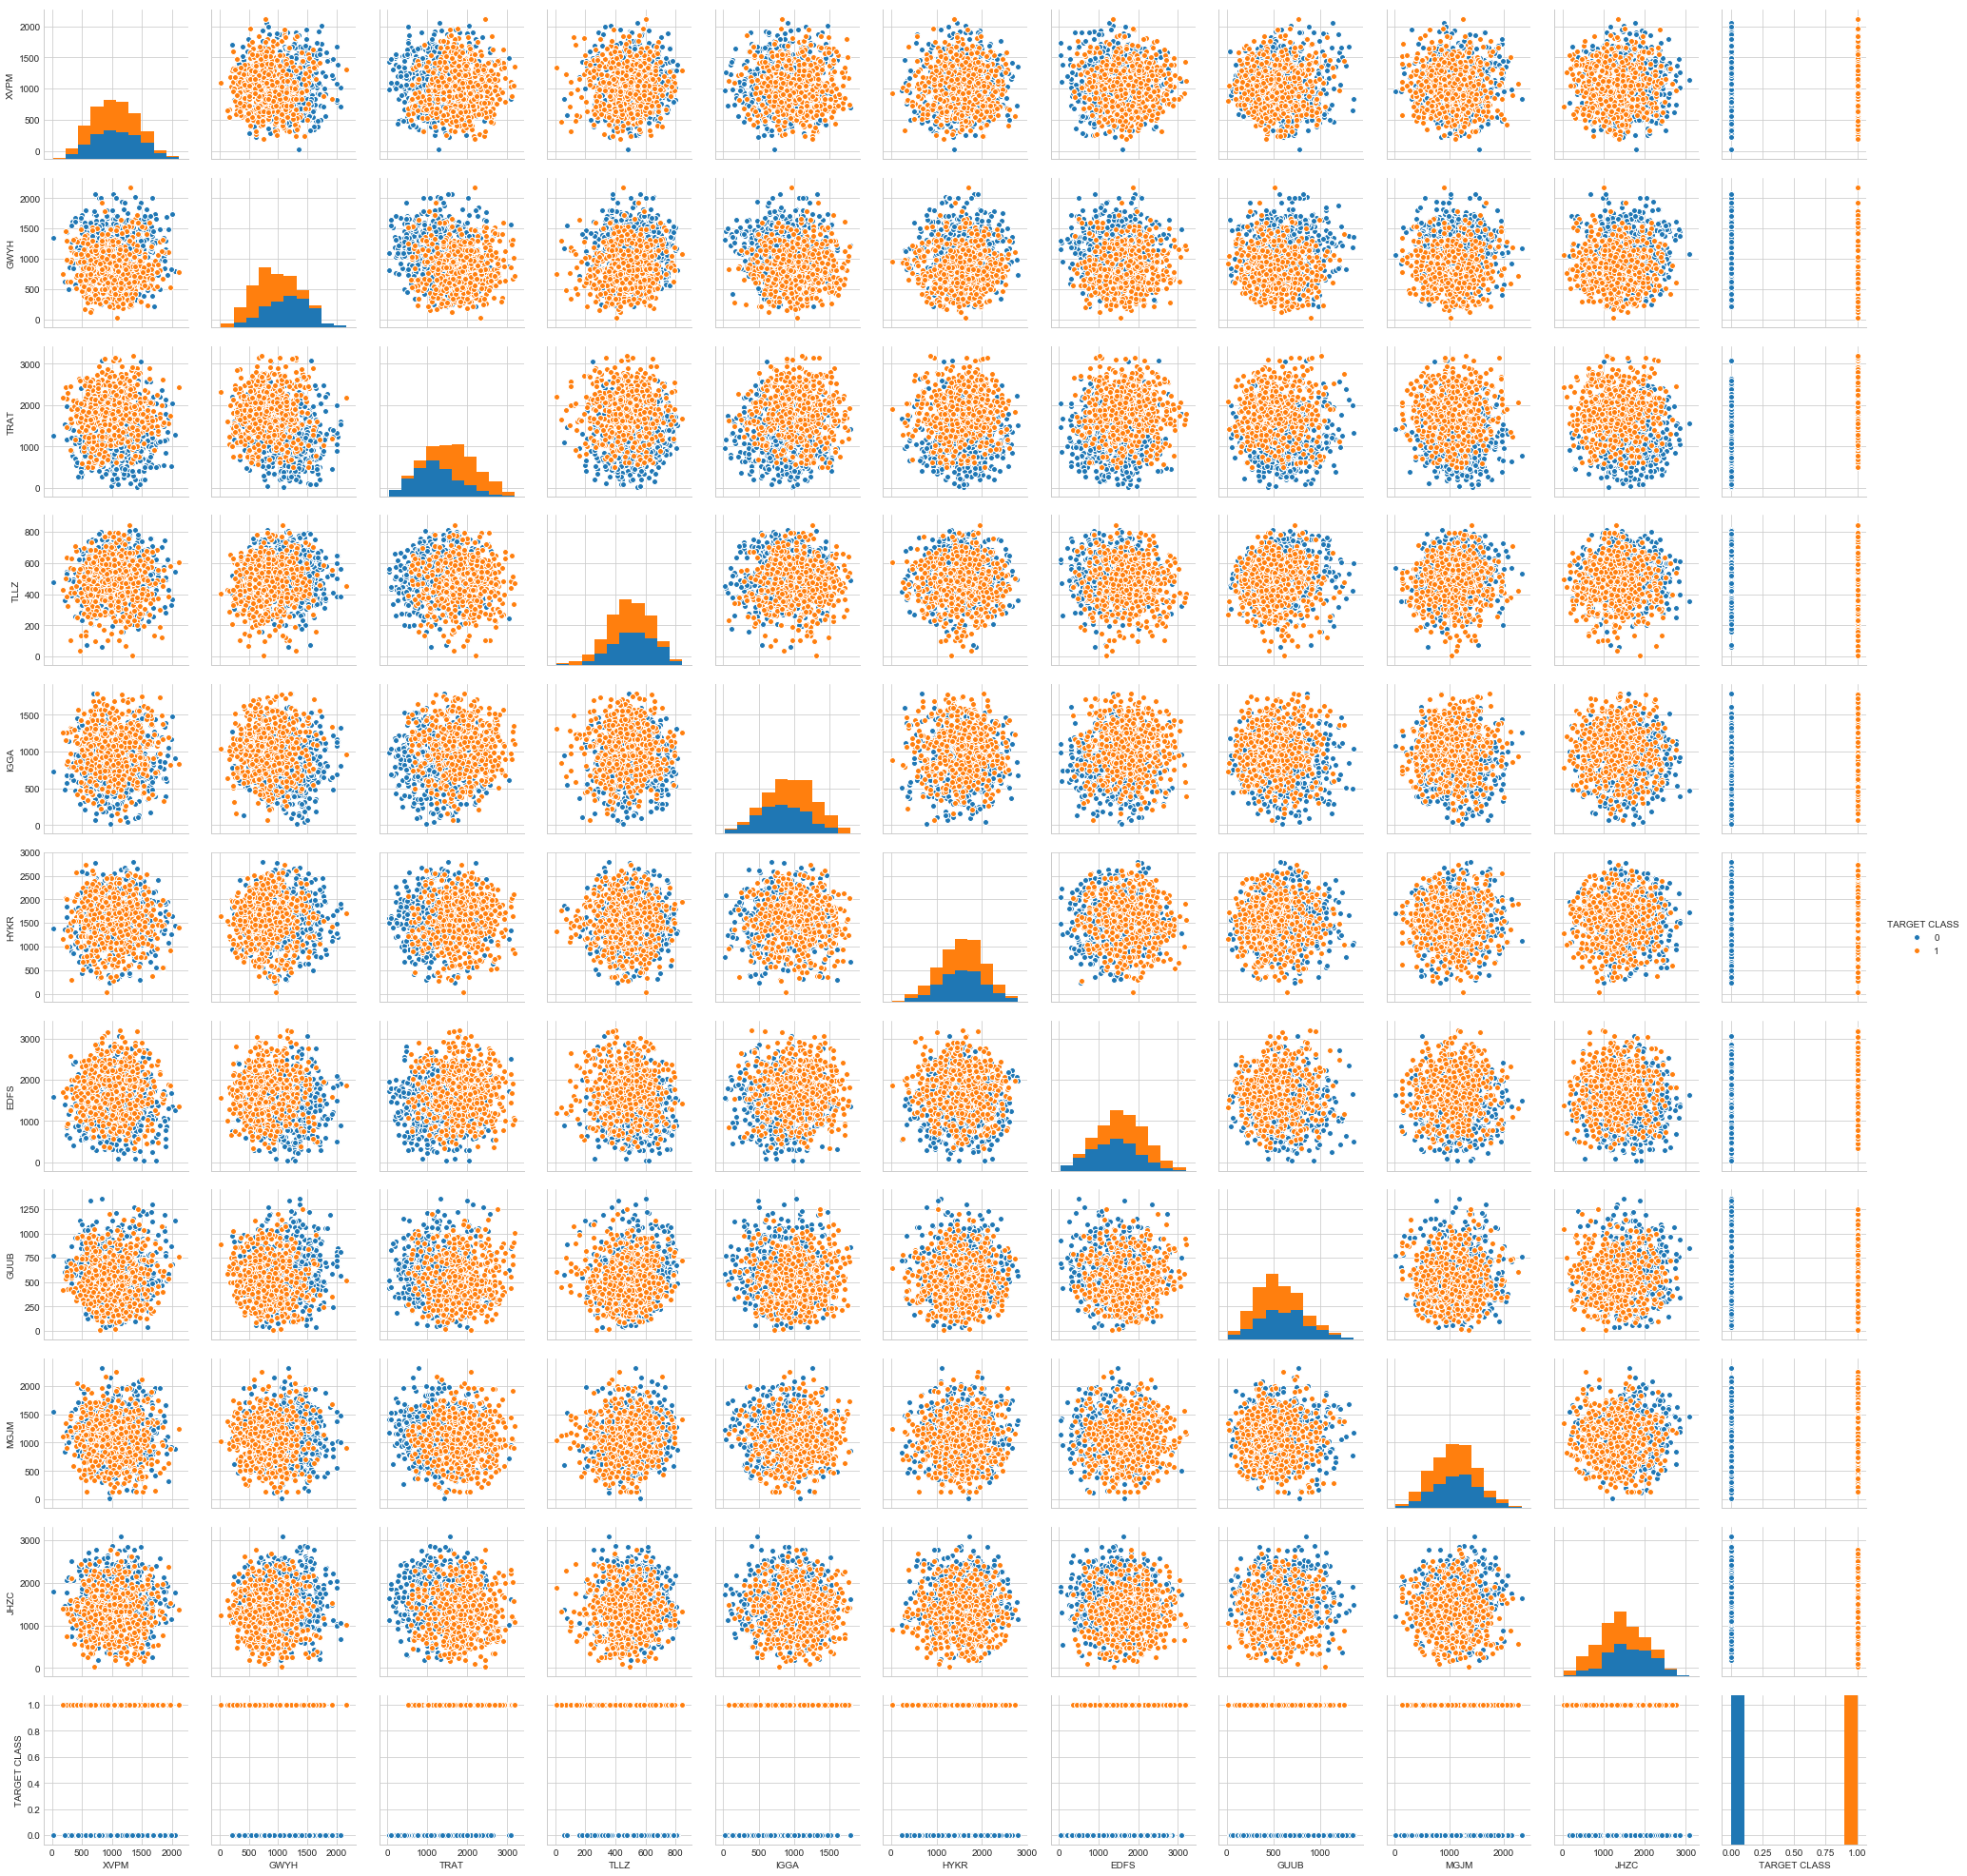

In [10]:
sns.set_style('whitegrid')
sns.pairplot(df, hue ='TARGET CLASS')

# Histogram 

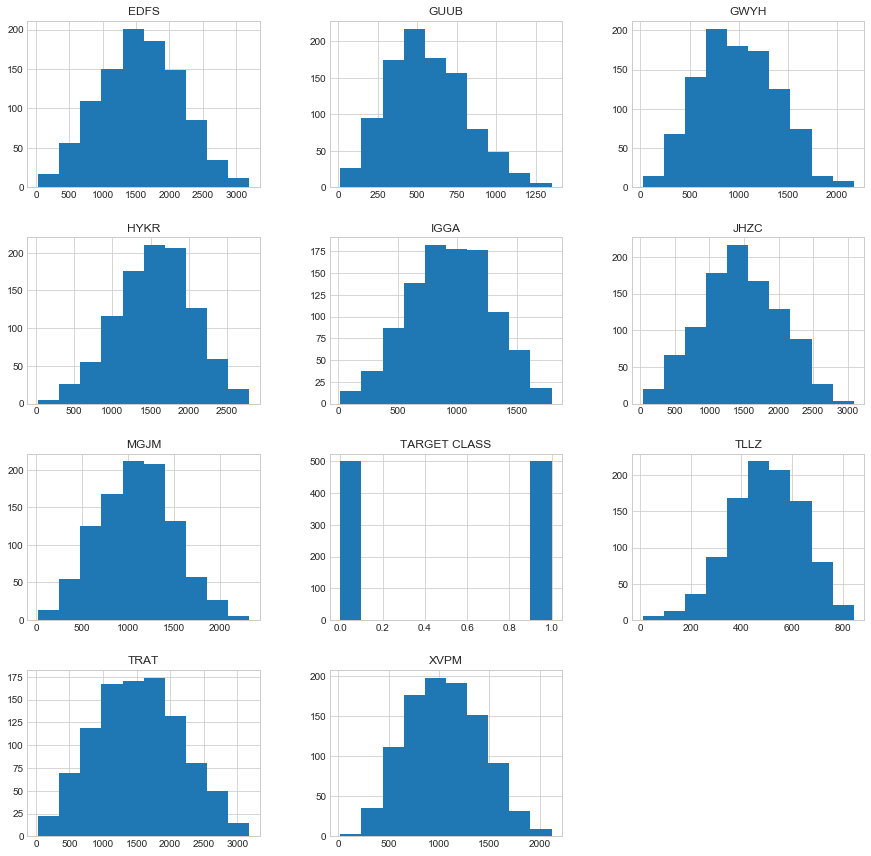

In [11]:
df.hist(figsize = (15,15))
plt.show()

# Density Plot

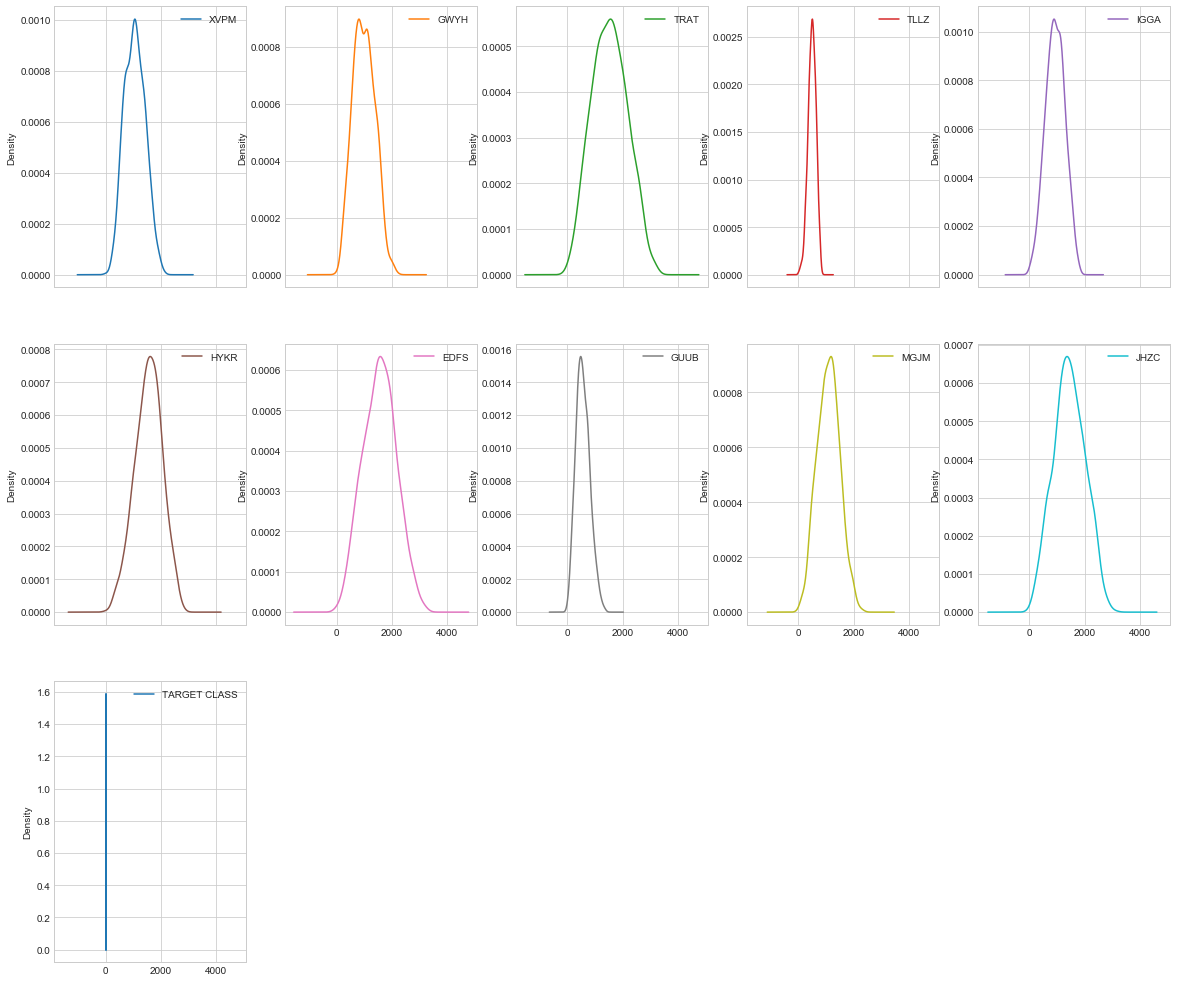

In [12]:
df.plot(kind='density', figsize= (20,30),layout = (5,5),subplots=True)
plt.show()

 # Box Plot

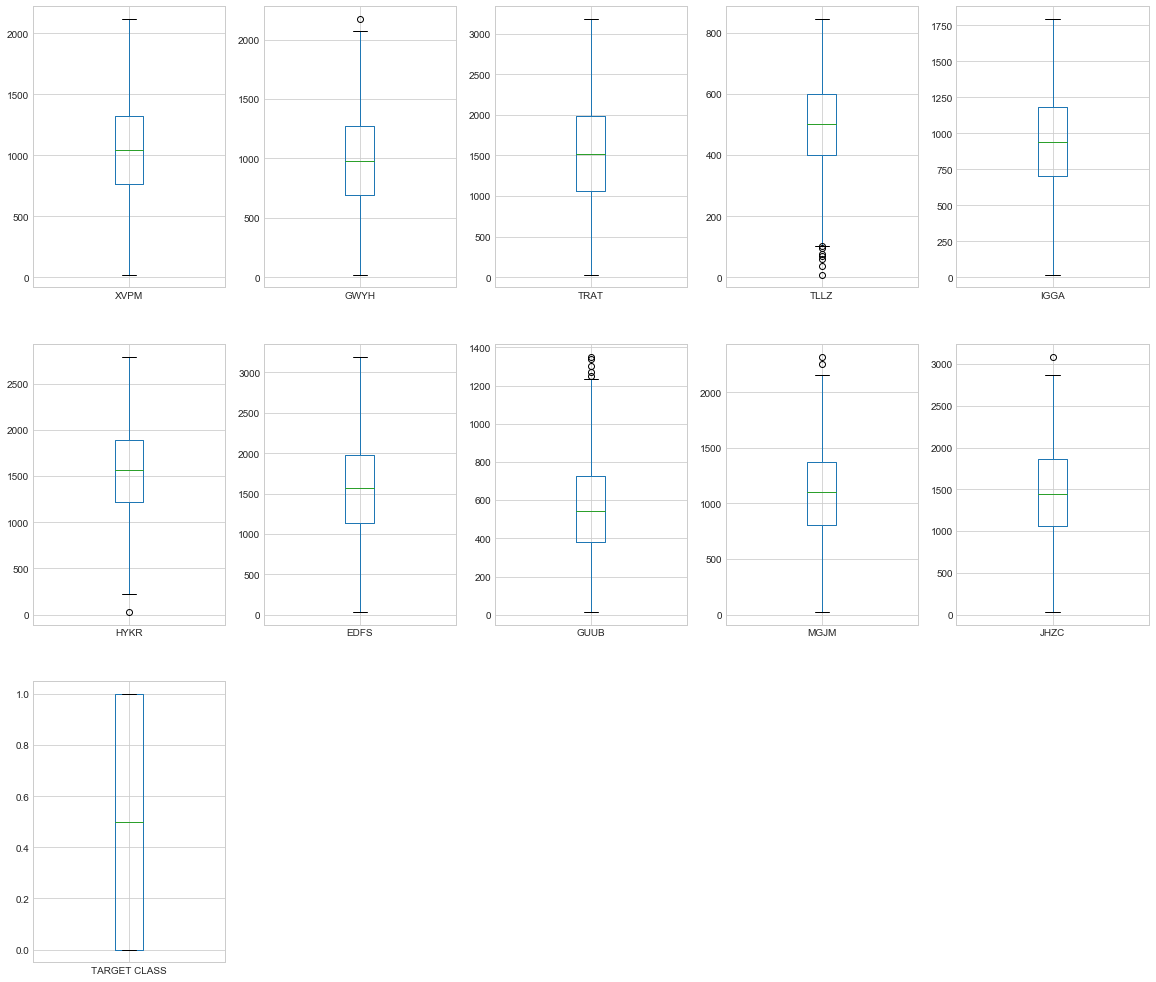

In [13]:
df.plot(kind='box', figsize = (20,30),subplots=True, layout=(5,5),sharex=False)
plt.show()

 # Correlation plot

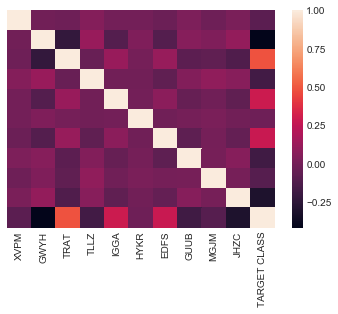

In [14]:
sns.heatmap(df.corr(), yticklabels = False)

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [15]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [16]:
scaler = StandardScaler() # Centering and scaling happen independently on each feature

** Fit scaler to the features.**

In [17]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [18]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [19]:
scaled_df = pd.DataFrame(scaled_features, columns =df.columns.drop('TARGET CLASS'))

In [20]:
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [21]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = scaled_df 
y= df['TARGET CLASS']
test_size = 0.30
seed = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)

# import k-fold and cross_val_score and grid searchCV from model_selection

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Kfold cross validation without gridsearch

In [77]:
kfold = KFold(n_splits = 10, random_state = 101)
results = cross_val_score(knn,x_train,y_train,cv=kfold,scoring ='accuracy' )

In [119]:
print(' ACCURACY => Mean: {} & SD:{}'.format(results.mean().round(3),results.std().round(3)))

 ACCURACY => Mean: 0.743 & SD:0.033


### Kfold cross validation with gridsearch to find optimum n_neighbors(k)

In [79]:
knn_grid = range(1,40)
param_grid = dict(n_neighbors= knn_grid)
grid = GridSearchCV(estimator=knn, param_grid=param_grid,cv=kfold,scoring='accuracy', n_jobs=-1,verbose = 1)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 39 candidates, totalling 390 fits


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 390 out of 390 | elapsed:    7.5s finished


In [118]:
print(grid_result)
print('Best Accuracy Score: {}'.format(grid.best_score_))
print('Optimum Parameter: k = {}'.format(grid.best_estimator_.n_neighbors))
print('CV Results: {}'.format(grid.cv_results_))

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)
Best Accuracy Score: 0.8342857142857143
Optimum Parameter: k = 38
CV Results: {'mean_fit_time': array([0.00468731, 0.004687  , 0.00312505, 0.0046875 , 0.00312524,
       0.00312514, 0.00468738, 0.00312493, 0.00156262, 0.00196843,
       0.00216191, 0.00069945, 0.00059962, 0.00254083, 0.00734916,
       0.00266156, 0.00259833, 0.00269837, 0.00299816, 0.00279822,
       0.00279827, 0.00349789, 0.0026983 , 0.00289829, 0.00389771,
       0.0033978 , 0.00329783, 0.00299799, 0.00429723, 0.00259867,
       0.00309792, 0

** K = 38 returns the lowest error **

# Now Choosing the K Value by ELBOW method (optional)

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_hat_i = knn.predict(x_test)
    error_rate.append(sum(y_hat_i != y_hat))

** Plotting the error rate aganinst K**

Text(0,0.5,'Error Rate')

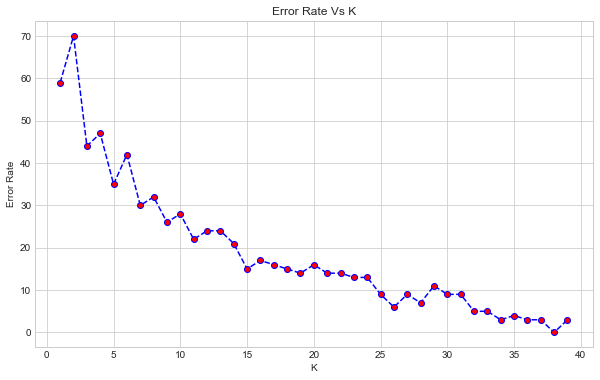

In [116]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='b',linestyle='dashed',marker = 'o',markerfacecolor='r')
plt.title('Error Rate Vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

** Taking k=38 as the optimum parameter and Fitting this KNN model to the training data.**

In [98]:
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=38, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [99]:
y_hat = knn.predict(x_test)

** Create a confusion matrix and classification report.**

In [100]:
from sklearn.metrics import confusion_matrix,classification_report

In [102]:
print(classification_report(y_test,y_hat))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300



In [103]:
print(confusion_matrix(y_test,y_hat))

[[126  26]
 [ 23 125]]
